In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
import time

In [ ]:
# train_test split 
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()  

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
num_classes = 10   #10개 category 범주화 
y_train = np_utils.to_categorical(y_train) # one-hot vector 
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train.shape   

(50000, 10)

In [ ]:
validation_images, validation_labels = x_train[:500], y_train[:500]  # 500개 까지 slicing 
train_images, train_labels = x_train[500:], y_train[500:]     # 49,500개를 training data로 사용 

In [ ]:
train_images.shape  # 49500개, 32*32 image, 3 channel

(49500, 32, 32, 3)

In [8]:
model = keras.models.Sequential([
                                 
                                 
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2 ,2 )),
    keras.layers.Conv2D( 256 , kernel_size=(5,5), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2 ,2 )  ),
    keras.layers.Conv2D(384  , kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 384 ,kernel_size=(1,1), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 256,kernel_size=(1,1), strides=(1,1) , padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2) ),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'  ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense( 4096, activation='relu' ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense( 10 , activation='softmax')
])

https://stackoverrun.com/ko/q/11696058

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [10]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

fit_generator 함수 사용 이유
- ImageDataGenerator() 만든 이미지 크기가 크기 때문
- 메모리 공간을 고려(메모리 최적화)
- flow 함수 사용, 한 개씩 fit 한 후 메모리 삭제

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [12]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 61s 19ms/step - loss: 1.8117 - accuracy: 0.3578 - val_loss: 1.6550 - val_accuracy: 0.3880
Epoch 2/10
1547/1547 [==============================] - 29s 19ms/step - loss: 1.4495 - accuracy: 0.4865 - val_loss: 1.4001 - val_accuracy: 0.5020
Epoch 3/10
1547/1547 [==============================] - 29s 19ms/step - loss: 1.3000 - accuracy: 0.5459 - val_loss: 1.5344 - val_accuracy: 0.4760
Epoch 4/10
1547/1547 [==============================] - 29s 19ms/step - loss: 1.1941 - accuracy: 0.5835 - val_loss: 1.0711 - val_accuracy: 0.6120
Epoch 5/10
1547/1547 [==============================] - 29s 19ms/step - loss: 1.1349 - accuracy: 0.6046 - val_loss: 1.0639 - val_accuracy: 0.6240
Epoch 6/10
1547/1547 [==============================] - 30s 19ms/step - loss: 1.0681 - accuracy: 0.6294 - val_loss: 1.3424 - val_accuracy: 0.5580
Epoch 7/10
1547/1547 [==============================] - 29s 19ms/step - loss: 1.0275 - accuracy: 0.6450 - val_loss: 1.0710 -

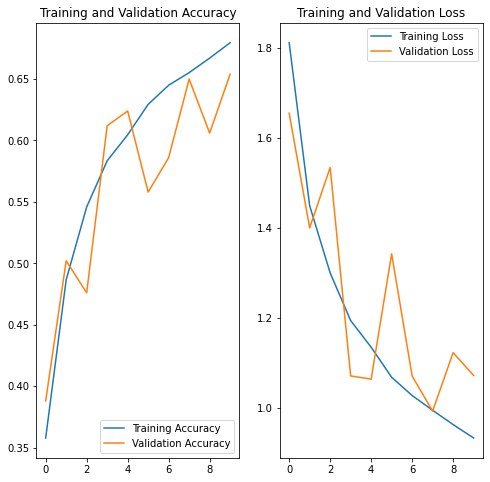

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()